## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from PIL import Image
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [4]:
path = 'C:\\Users\\kkart\\PGP AIML\\Computer Vision - 3\\Datasets\\train'

train_dir_content = os.listdir(path)

for i in range (len(train_dir_content)):   
    current_class_name = train_dir_content[i]
    class_dir = os.path.join(path, current_class_name)
    image_in_class = os.listdir(class_dir)
    print("Number of samples in class named ", current_class_name, ":", len(image_in_class))

Number of samples in class named  Black-grass : 263
Number of samples in class named  Charlock : 390
Number of samples in class named  Cleavers : 287
Number of samples in class named  Common Chickweed : 611
Number of samples in class named  Common wheat : 221
Number of samples in class named  Fat Hen : 475
Number of samples in class named  Loose Silky-bent : 654
Number of samples in class named  Maize : 221
Number of samples in class named  Scentless Mayweed : 516
Number of samples in class named  Shepherds Purse : 231
Number of samples in class named  Small-flowered Cranesbill : 496
Number of samples in class named  Sugar beet : 385


(756, 756, 3)
Sugar beet


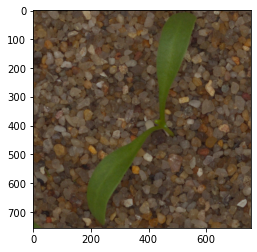

In [5]:
image_file_dir = os.path.join(class_dir, image_in_class[0])
img = preprocessing.image.load_img(image_file_dir)
image_array = preprocessing.image.img_to_array(img)
print(image_array.shape)
image_array = image_array/255.0
print(current_class_name)
plt.imshow(image_array)
plt.show()

## Load images

In [6]:
#load images as np arrays
def load_data(fpath):    
    img=Image.open(fpath).resize((224,224))
#     img = img.resize()# resize to 224x224 for training purposes
    img = np.asarray(img, dtype='float32')
    return img

In [7]:
labels=[]
dataset_array = []
for i in range (len(train_dir_content)):
    
    current_class_name = train_dir_content[i]
    class_dir = os.path.join(path, current_class_name)
    images_in_class = os.listdir(class_dir)
   
    for image_file in images_in_class:
        if image_file.endswith(".png"):
            image_file_dir= os.path.join(class_dir,image_file)
        
            img = preprocessing.image.load_img(image_file_dir, target_size=(28,28))
        
            img_array = preprocessing.image.img_to_array(img)
        
            img_array = img_array/255.0
            img_array = img_array.flatten()
            dataset_array.append(img_array)
            labels.append(current_class_name)

    
    
    print("Class ", current_class_name, "Array shape :", dataset_array.count)

Class  Black-grass Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Charlock Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Cleavers Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Common Chickweed Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Common wheat Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Fat Hen Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Loose Silky-bent Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Maize Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Scentless Mayweed Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Shepherds Purse Array shape : <built-in method count of list object at 0x000002941C1A2D80>
Class  Small-flowered Cranesbill Array shape : <built-i

In [8]:
dataset_array = np.array(dataset_array)
print( "Array shape :", dataset_array.shape)
df = pd.DataFrame(dataset_array)

Array shape : (4750, 2352)


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,0.380392,0.282353,0.207843,0.407843,0.345098,0.266667,0.450980,0.407843,0.349020,0.376471,...,0.215686,0.223529,0.215686,0.227451,0.552941,0.572549,0.600000,0.498039,0.517647,0.537255
1,0.243137,0.219608,0.168627,0.352941,0.262745,0.156863,0.411765,0.352941,0.243137,0.368627,...,0.203922,0.341176,0.219608,0.129412,0.380392,0.286275,0.180392,0.403922,0.345098,0.290196
2,0.258824,0.192157,0.145098,0.380392,0.325490,0.262745,0.439216,0.388235,0.313726,0.247059,...,0.313726,0.556863,0.541176,0.541176,0.517647,0.509804,0.505882,0.458824,0.450980,0.443137
3,0.384314,0.278431,0.149020,0.419608,0.309804,0.184314,0.458824,0.360784,0.235294,0.450980,...,0.117647,0.388235,0.349020,0.282353,0.419608,0.384314,0.321569,0.345098,0.282353,0.227451
4,0.662745,0.674510,0.674510,0.662745,0.670588,0.682353,0.662745,0.654902,0.666667,0.674510,...,0.121569,0.219608,0.168627,0.129412,0.196078,0.129412,0.098039,0.145098,0.109804,0.082353


In [10]:
df.shape

(4750, 2352)

In [11]:
df['label'] = labels

In [12]:
df1 = df.copy()

## Train test split

In [13]:
X = df.drop('label', axis = 1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Supervised Learning

In [41]:
sl_model = svm.SVC(gamma=0.01, C=10) 
sl_model.fit(X_train , y_train)
y_pred = sl_model.predict(X_test)

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5171929824561403


## Neural Network

In [14]:
rename_dict = {'Cleavers' : 1, 'Sugar beet' : 2, 'Common Chickweed' : 3, 'Loose Silky-bent' : 4,
       'Scentless Mayweed' : 5, 'Shepherds Purse' : 6 , 'Fat Hen' : 7, 'Common wheat' : 8,
       'Black-grass' : 9, 'Small-flowered Cranesbill' : 10, 'Charlock' : 11, 'Maize': 12}
  
df1 = df.replace({"label": rename_dict})

In [15]:
df1['label'].unique()

array([ 9, 11,  1,  3,  8,  7,  4, 12,  5,  6, 10,  2], dtype=int64)

In [16]:
y = pd.get_dummies(df1.label, prefix='plant')
X = df1.drop('label', axis = 1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
X_train.shape

(3325, 2352)

In [19]:
y_train.shape

(3325, 12)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

def nn_model(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 12
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(2352,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1)

In [85]:
def nn_model1(iterations, lr, Lambda, verb=True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 256
    output_nodes = 12

    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(2352,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=100, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    
    return score

#### Lambda(small regularization) = 1e-7, learning rate = 1e-7

In [86]:
lr = 1e-7
Lambda = 1e-7
nn_model(20, lr, Lambda)

Epoch 1/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5315 - accuracy: 0.0917
Epoch 2/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5315 - accuracy: 0.0917
Epoch 3/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5314 - accuracy: 0.0917
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5314 - accuracy: 0.0917
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5313 - accuracy: 0.0917
Epoch 6/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5312 - accuracy: 0.0917
Epoch 7/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5312 - accuracy: 0.0917
Epoch 8/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5311 - accuracy: 0.0920
Epoch 9/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5311 - accuracy: 0.0923
Epoch 10/20
34/34 [==============================] - 0s 4ms/step - loss: 2.5310 - accuracy: 0.0923
Epoch 11/20
34/34 [

#### Let us attempt by reducing the learning rate to 1e4

In [88]:
lr = 1e4
Lambda = 1e-7
nn_model(20, lr, Lambda)

Epoch 1/20
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0671
Epoch 2/20
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 3/20
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 4/20
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 5/20
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 6/20
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epoch 7/20
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epoch 8/20
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epoch 9/20
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 10/20
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epoch 11/20
34/34 [==============================

#### Loss is exploding, accuracy is very low hence run coarse search for 10 times with different lr and Lambda values each with 100 epochs

In [89]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = nn_model1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4214 - accuracy: 0.1420
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3129 - accuracy: 0.1820
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 2.1446 - accuracy: 0.2385
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 1.9702 - accuracy: 0.2947
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 1.9083 - accuracy: 0.3128
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 1.9762 - accuracy: 0.2899
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7677 - accuracy: 0.3669
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 1.7015 - accuracy: 0.3735
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 1.6987 - accuracy: 0.3895
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 1.6380 - accuracy: 0.3988
Epoch 11/

34/34 [==============================] - 0s 4ms/step - loss: 1.0672 - accuracy: 0.6090
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 1.1624 - accuracy: 0.5681
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 1.0575 - accuracy: 0.6147
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 1.1708 - accuracy: 0.5657
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 1.0895 - accuracy: 0.5826
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 1.0397 - accuracy: 0.6069
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 1.2332 - accuracy: 0.5408
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 1.3261 - accuracy: 0.4977
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 1.1126 - accuracy: 0.5841
Epoch 92/100
34/34 [==============================] - 0s 4ms/step - loss: 1.0342 - accuracy: 0.6090
Epoch 93/100


34/34 [==============================] - 0s 4ms/step - loss: 2.5155 - accuracy: 0.0535
Epoch 44/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5154 - accuracy: 0.0535
Epoch 45/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5154 - accuracy: 0.0538
Epoch 46/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5153 - accuracy: 0.0535
Epoch 47/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5152 - accuracy: 0.0535
Epoch 48/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5151 - accuracy: 0.0535
Epoch 49/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5151 - accuracy: 0.0535
Epoch 50/100
34/34 [==============================] - 0s 3ms/step - loss: 2.5150 - accuracy: 0.0535
Epoch 51/100
34/34 [==============================] - 0s 3ms/step - loss: 2.5149 - accuracy: 0.0535
Epoch 52/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5149 - accuracy: 0.0538
Epoch 53/100


34/34 [==============================] - 0s 4ms/step - loss: 2.3858 - accuracy: 0.1856
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3814 - accuracy: 0.1615
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3774 - accuracy: 0.2003
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3727 - accuracy: 0.1841
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 2.3678 - accuracy: 0.2096
Epoch 12/100
34/34 [==============================] - 0s 3ms/step - loss: 2.3634 - accuracy: 0.1934
Epoch 13/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3587 - accuracy: 0.2186
Epoch 14/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3538 - accuracy: 0.2036
Epoch 15/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3491 - accuracy: 0.2241
Epoch 16/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3440 - accuracy: 0.2211
Epoch 17/100
34

34/34 [==============================] - 0s 4ms/step - loss: 1.8518 - accuracy: 0.3786
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8438 - accuracy: 0.3847
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8376 - accuracy: 0.3805
Epoch 92/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8307 - accuracy: 0.3928
Epoch 93/100
34/34 [==============================] - 0s 3ms/step - loss: 1.8246 - accuracy: 0.3862
Epoch 94/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8171 - accuracy: 0.3910
Epoch 95/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8118 - accuracy: 0.3898
Epoch 96/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8063 - accuracy: 0.3937
Epoch 97/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7965 - accuracy: 0.3946
Epoch 98/100
34/34 [==============================] - 0s 4ms/step - loss: 1.7907 - accuracy: 0.4051
Epoch 99/100


34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 73/100
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 74/100
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 75/100
34/34 [==============================] - ETA: 0s - loss: nan - accuracy: 0.060 - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epoch 76/100
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 77/100
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 78/100
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 79/100
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epoch 80/100
34/34 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0608
Epoch 81/100
34/34 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0608
Epo

34/34 [==============================] - 0s 4ms/step - loss: 2.7131 - accuracy: 0.1365
Epoch 34/100
34/34 [==============================] - 0s 4ms/step - loss: 2.7030 - accuracy: 0.1224
Epoch 35/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6926 - accuracy: 0.1251
Epoch 36/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6704 - accuracy: 0.1293
Epoch 37/100
34/34 [==============================] - 0s 3ms/step - loss: 2.6632 - accuracy: 0.1266
Epoch 38/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6615 - accuracy: 0.1320
Epoch 39/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6568 - accuracy: 0.1245
Epoch 40/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6350 - accuracy: 0.1296
Epoch 41/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6269 - accuracy: 0.1344
Epoch 42/100
34/34 [==============================] - 0s 3ms/step - loss: 2.6200 - accuracy: 0.1209
Epoch 43/100


34/34 [==============================] - 0s 4ms/step - loss: 2.4105 - accuracy: 0.1561
Epoch 95/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4103 - accuracy: 0.1564
Epoch 96/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4101 - accuracy: 0.1564
Epoch 97/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4099 - accuracy: 0.1567
Epoch 98/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4097 - accuracy: 0.1570
Epoch 99/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4095 - accuracy: 0.1570
Epoch 100/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4093 - accuracy: 0.1570
Try 9/100: Best_val_acc: [2.4092085361480713, 0.15729323029518127], lr: 7.018749554560381e-06, Lambda: 0.00013055706949124428



#### Now we shall witness increase in accuracy rate, hence we will go for more finer search

In [90]:
import math
for k in range(1,5):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = nn_model1(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 2.6456 - accuracy: 0.0983
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 2.5689 - accuracy: 0.1182
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 2.5465 - accuracy: 0.1332
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5367 - accuracy: 0.1398
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5303 - accuracy: 0.1408
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5244 - accuracy: 0.1438
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5199 - accuracy: 0.1552
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5160 - accuracy: 0.1486
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5121 - accuracy: 0.1612
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 2.5086 - accuracy: 0.1732
Epoch 11/

34/34 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.8797
Epoch 63/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.8908
Epoch 64/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5238 - accuracy: 0.8574
Epoch 65/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.9020
Epoch 66/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.9128
Epoch 67/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.9131
Epoch 68/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8971
Epoch 69/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8851
Epoch 70/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8875
Epoch 71/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.9023
Epoch 72/100


34/34 [==============================] - 0s 3ms/step - loss: 1.8815 - accuracy: 0.3368
Epoch 23/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7990 - accuracy: 0.3341
Epoch 24/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7572 - accuracy: 0.3570
Epoch 25/100
34/34 [==============================] - 0s 3ms/step - loss: 1.9098 - accuracy: 0.2995
Epoch 26/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7304 - accuracy: 0.3696
Epoch 27/100
34/34 [==============================] - 0s 3ms/step - loss: 1.7154 - accuracy: 0.3654
Epoch 28/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5801 - accuracy: 0.4183
Epoch 29/100
34/34 [==============================] - 0s 3ms/step - loss: 1.6919 - accuracy: 0.3723
Epoch 30/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5862 - accuracy: 0.4108
Epoch 31/100
34/34 [==============================] - 0s 3ms/step - loss: 1.5798 - accuracy: 0.4235
Epoch 32/100


In [92]:
lr = 0.035
Lambda = 0.003
nn_model1(100, lr, Lambda)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 2.4871 - accuracy: 0.1456
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 2.3394 - accuracy: 0.2183
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 2.2097 - accuracy: 0.2322
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 2.1840 - accuracy: 0.2505
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 2.0075 - accuracy: 0.2914
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 1.9029 - accuracy: 0.3176
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 2.0749 - accuracy: 0.2788
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 2.0144 - accuracy: 0.2962
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8348 - accuracy: 0.3489
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 1.8956 - accuracy: 0.3203
Epoch 11/

[0.37687060236930847, 0.8947368264198303]

## Computer Vision

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [139]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   path,
    validation_split=0.2, #80% training
    subset="training",
    seed=123,
    image_size=(128,128),
    batch_size=32)


Found 4750 files belonging to 12 classes.
Using 3800 files for training.


In [140]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2, #20% validation
    subset="validation",
    seed=123,
    image_size=(128,128),
    batch_size=32)

Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [141]:
class_names = train_ds.class_names
print('The name of the classes are: ')
for c in class_names:
    print(c)

The name of the classes are: 
	- Black-grass
	- Charlock
	- Cleavers
	- Common Chickweed
	- Common wheat
	- Fat Hen
	- Loose Silky-bent
	- Maize
	- Scentless Mayweed
	- Shepherds Purse
	- Small-flowered Cranesbill
	- Sugar beet


## Display few images

<ipython-input-142-cd5d0c0e5a7b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, i + 1)


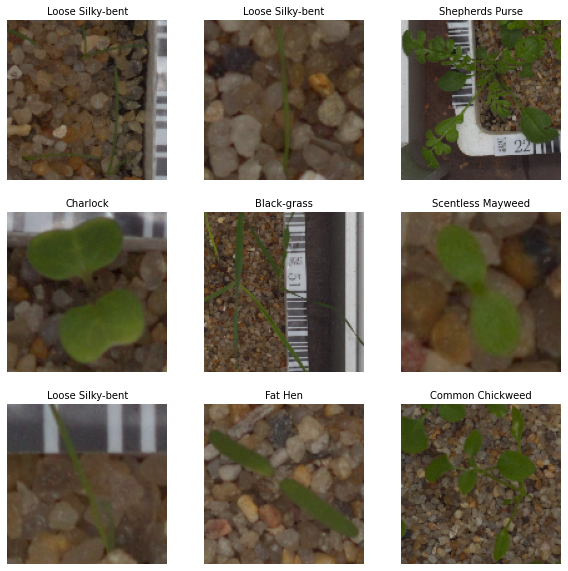

In [142]:
fig = plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[i]], fontsize=10)
        plt.imshow(images[i].numpy().astype("uint8"))
        ax = plt.axis("off")

In [143]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) #lambda
image_batch, labels_batch = next(iter(normalized_ds))

first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0063265935 0.65044427


In [144]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(128, 
                                                              128,
                                                              3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

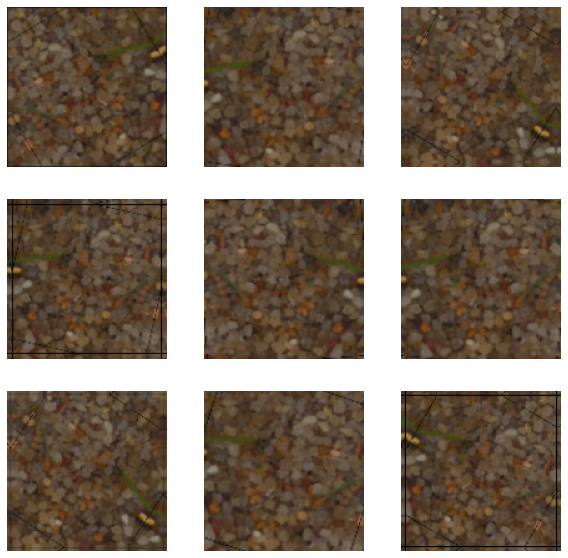

In [145]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        ax = plt.axis("off")

In [146]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(128,128,3,))) # Input layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu')) # 2D Convolution layer
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2))) # Max Pool layer 
model.add(tf.keras.layers.GlobalMaxPool2D()) # Global Max Pool layer
model.add(tf.keras.layers.Flatten()) # Dense Layers after flattening the data
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # Dropout
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Normalization layer
model.add(tf.keras.layers.Dense(12, activation='softmax')) # Add Output Layer

In [147]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model summary

In [148]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 128)     

## Fit the model

In [149]:
epochs = 15 #the cycle
activity = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/15
119/119 [==============================] - 108s 904ms/step - loss: 2.2744 - accuracy: 0.3666 - val_loss: 2.4041 - val_accuracy: 0.2021
Epoch 2/15
119/119 [==============================] - 105s 886ms/step - loss: 2.0725 - accuracy: 0.5647 - val_loss: 2.1813 - val_accuracy: 0.4389
Epoch 3/15
119/119 [==============================] - 105s 886ms/step - loss: 2.0063 - accuracy: 0.6337 - val_loss: 2.1133 - val_accuracy: 0.5000
Epoch 4/15
119/119 [==============================] - 106s 888ms/step - loss: 1.9729 - accuracy: 0.6563 - val_loss: 2.0314 - val_accuracy: 0.5947
Epoch 5/15
119/119 [==============================] - 106s 887ms/step - loss: 1.9275 - accuracy: 0.7071 - val_loss: 1.9939 - val_accuracy: 0.6274
Epoch 6/15
119/119 [==============================] - 110s 922ms/step - loss: 1.8973 - accuracy: 0.7353 - val_loss: 2.0072 - val_accuracy: 0.6147
Epoch 7/15
119/119 [==============================] - 110s 924ms/step - loss: 1.8765 - accuracy: 0.7574 - val_loss: 1.8972 -

#### from the above models we can see that CNN outperforms Neural networks which in tern outperforms supervised learning significantly. Accuracy changes from 0.53 to 0.84 and then to 0.89. The output of CNN can still be improved by changing the layers

## Save weights

In [150]:
model.save('cnn_model.h5')
model.save_weights('cnn_model_weights.h5')

## Accuracy and loss plot

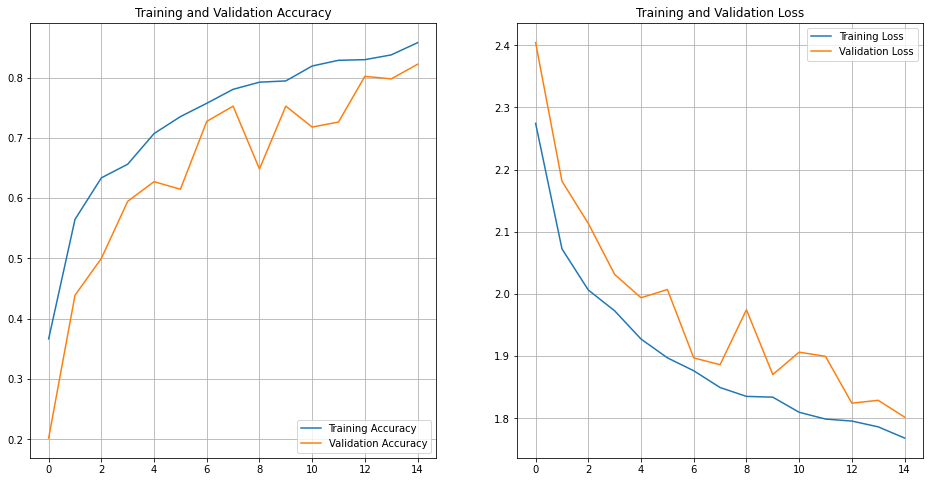

In [151]:
acc = activity.history['accuracy']
val_acc = activity.history['val_accuracy']

loss = activity.history['loss']
val_loss = activity.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

## Prediction

In [152]:
data_dir_test_path = 'C:\\Users\\Venkat Karthi\\PGP AIML\\Computer Vision - 3\\Prediction\\Predict.png'

img = preprocessing.image.load_img(data_dir_test_path, target_size=(128, 128))
img_array = preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) #in the format it should be to perform prediction

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

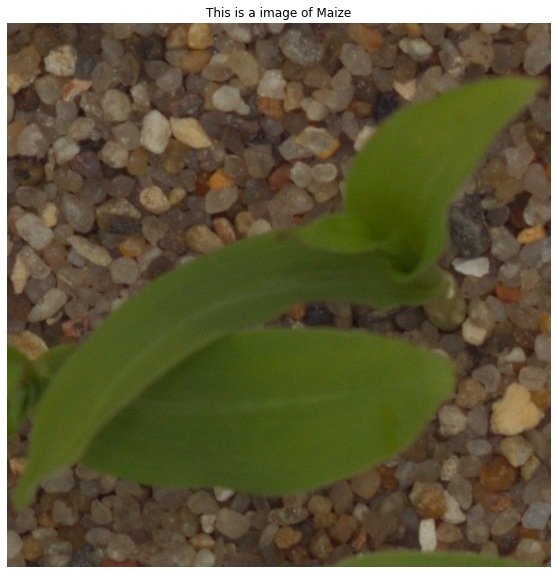

In [153]:
plt.figure(figsize=(10, 10))
plt.title("This is a image of " + (class_names[np.argmax(score)]))
plt.imshow(PIL.Image.open(data_dir_test_path))
ax = plt.axis("off")

# Part - 2

1. Machine Learning models makes predictions based on its learning from the data where Neural Network or CNN can make predictions on its own.
2. Advantage of CNN compared to Neural network and supervised learning is that it automatically detects the important features without any human supervision. For example, given many pictures it can learn the key features for each class by itself.
3. In image classification, we wont know the features explicitely as a structure table data and hence a supervised learning algorithm cannot be used and CNN is preferred. Same way since we dont know the features CNN is preferred since it can identify the the details automatically
4. Supervised learning is quite a simple algorithm compared to NN

## Part - 3

In [165]:
cars_path = 'C:\\Users\\Venkat Karthi\\PGP AIML\\Computer Vision - 3\\Cars'

In [166]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
   cars_path,
    validation_split=0.2, #80% training
    subset="training",
    seed=123,
    image_size=(128,128),
    batch_size=32)

Found 60 files belonging to 6 classes.
Using 48 files for training.


In [167]:
class_names = train_ds.class_names
class_names

['Honda', 'Hyundai New', 'Kia', 'Mahindra', 'Maruthi Suzuki', 'Tata']

<ipython-input-168-cd5d0c0e5a7b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, i + 1)


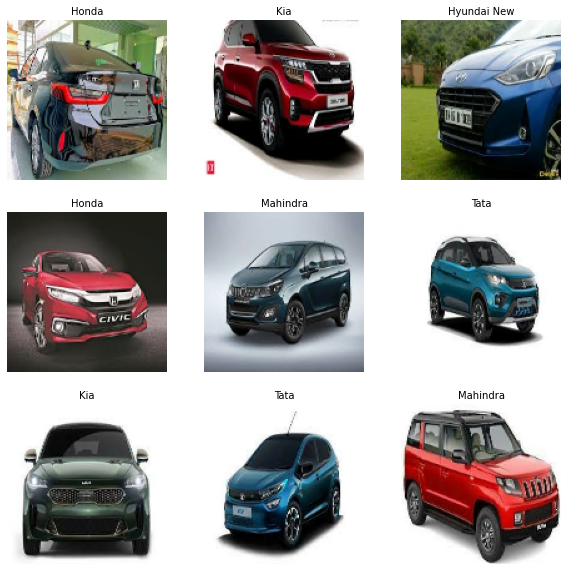

In [168]:
fig = plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[i]], fontsize=10)
        plt.imshow(images[i].numpy().astype("uint8"))
        ax = plt.axis("off")

### A small cars dataset with its manufacturs has been created. There are total of 6 cars manufactures used. 

Main challenges faces are as follows
1. It is time consuming to create a proper dataset
2. The dataset needs to be chosen carefully and there should not any wrong labels
3. the format of the dataset should be on same type and it should be an image format
4. This dataset might not represent the real worl scenarios